In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals


import pandas as pd
import numpy as np
import time
import re
import string
import copy
import operator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




from nltk.tokenize import TreebankWordTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pprint
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
#def get_data():
train_haptik = pd.read_csv('../Haptik-Domain-Classification/Data/Haptik_train_data.csv', encoding = 'UTF-8')
test_haptik = pd.read_csv('../Haptik-Domain-Classification/Data/Haptik_test_data.csv', encoding = 'UTF-8')
#return train_haptik, test_haptik    

In [3]:
train_haptik.shape

(40657, 10)

In [4]:
def make_x_y():
    global train_haptik
    global test_haptik
    x_train = train_haptik.iloc[:,0]
    x_test = test_haptik.iloc[:,0]
    Y_train = train_haptik.iloc[:,1:]
    Y_test = test_haptik.iloc[:,1:]
    return x_train, x_test, Y_train, Y_test
x_train, x_test, Y_train, Y_test = make_x_y()
#Y_train.head()
x_test.head()

0                                Nearest metro station
1                    Pick up n drop service trough cab
2                                I wants to buy a bick
3                                        Show me pizza
4    What is the cheapest package to andaman and ni...
Name: message, dtype: object

In [5]:
Y_train.head()

food recharge support reminders travel nearby movies casual other
0    F        F       F         T      F      F      F      F     F
1    T        F       F         F      F      F      F      F     F
2    F        F       T         F      F      F      F      F     F
3    F        F       F         F      T      F      F      F     F
4    F        F       F         F      T      F      F      F     F

In [6]:
Y_test.head()

food recharge support reminders travel nearby movies casual other
0    F        F       F         F      F      T      F      F     F
1    F        F       F         F      T      F      F      F     F
2    F        F       F         F      F      F      F      F     T
3    T        F       F         F      F      F      F      F     F
4    F        F       F         F      T      F      F      F     F

In [7]:
Y_train.describe()

food recharge support reminders travel nearby movies casual  other
count   40652    40652   40652     40652  40652  40652  40652  40652  40651
unique      2        2       2         2      2      2      2      2      2
top         F        F       F         F      F      F      F      F      F
freq    36673    37565   38805     33322  27153  36061  36649  34597  37662

### Multi label binarizer

In [8]:
def multi_label_binarizer(df):
    df = df.astype(str).applymap(lambda x: 1 if x=='T' else 0)
    return df

Y_train = multi_label_binarizer(Y_train)
Y_test = multi_label_binarizer(Y_test)

In [9]:
Y_test.head(15)

food  recharge  support  reminders  travel  nearby  movies  casual  other
0      0         0        0          0       0       1       0       0      0
1      0         0        0          0       1       0       0       0      0
2      0         0        0          0       0       0       0       0      1
3      1         0        0          0       0       0       0       0      0
4      0         0        0          0       1       0       0       0      0
5      0         0        0          1       0       0       0       0      0
6      0         0        0          0       0       1       0       0      0
7      1         0        0          0       0       0       0       0      0
8      0         0        0          0       0       0       1       0      0
9      0         0        0          1       0       0       0       0      0
10     0         0        0          0       0       0       0       0      1
11     0         0        0          0       0       0       1       0      0
12     0         0        0          0       0       0       0       0      1
13     0         0        0          0       1       0       0       0      0
14     0         0        0          0       0       0       0       0      1

In [10]:
Y_train.head()

food  recharge  support  reminders  travel  nearby  movies  casual  other
0     0         0        0          1       0       0       0       0      0
1     1         0        0          0       0       0       0       0      0
2     0         0        1          0       0       0       0       0      0
3     0         0        0          0       1       0       0       0      0
4     0         0        0          0       1       0       0       0      0

In [11]:
remove_list = [",", ':',"?", "}", "{", "...", ".", ")", "(", "hi", "!", "_", "r", "n", 'd', "..", "h",
               "sl", "@", "&", "s", "''", "0", "-", "r", "..", "h", "@", "'ll", "can", "u", "pleas", "like",
               "hello"]

### TreebankWordTokenizer

In [12]:
from nltk.tokenize import TreebankWordTokenizer
def Tree_bank_WordTokenizer(x):
    tokenizer = TreebankWordTokenizer()
    x = x.apply(lambda x: x.lower()).apply(lambda x: tokenizer.tokenize(x))
    return x

In [13]:
x_train = Tree_bank_WordTokenizer(x_train)
x_train.head()

0                                      [7am, everyday]
1                                    [chocolate, cake]
2    [closed, mortice, and, tenon, joint, door, dim...
3                              [train, eppo, kelambum]
4    [yesterday, i, have, cancelled, the, flight, t...
Name: message, dtype: object

In [14]:
x_test = Tree_bank_WordTokenizer(x_test)
x_test.head()

0                            [nearest, metro, station]
1            [pick, up, n, drop, service, trough, cab]
2                         [i, wants, to, buy, a, bick]
3                                    [show, me, pizza]
4    [what, is, the, cheapest, package, to, andaman...
Name: message, dtype: object

### PorterStemmer

In [15]:
from nltk.stem.porter import PorterStemmer

def por_stemmer(x):
    p_stemmer = PorterStemmer()
    x = x.apply(lambda row: [p_stemmer.stem(i) for i in row])
    return x

In [16]:
x_train = por_stemmer(x_train)
x_train.head()

0                                      [7am, everyday]
1                                       [chocol, cake]
2     [close, mortic, and, tenon, joint, door, diment]
3                              [train, eppo, kelambum]
4    [yesterday, i, have, cancel, the, flight, ticket]
Name: message, dtype: object

In [17]:
x_test = por_stemmer(x_test)
x_test.head()

0                            [nearest, metro, station]
1             [pick, up, n, drop, servic, trough, cab]
2                          [i, want, to, buy, a, bick]
3                                    [show, me, pizza]
4    [what, is, the, cheapest, packag, to, andaman,...
Name: message, dtype: object

In [18]:
x_test.head()

0                            [nearest, metro, station]
1             [pick, up, n, drop, servic, trough, cab]
2                          [i, want, to, buy, a, bick]
3                                    [show, me, pizza]
4    [what, is, the, cheapest, packag, to, andaman,...
Name: message, dtype: object

### Stop word removal

In [19]:
en_stop = get_stop_words('en')
en_stop 

remove_list = [",", ':',"?", "}", "{", "...", ".", ")", "(", "hi", "!", "_", "r", "n", 'd', "..", "h",
               "sl", "@", "&", "s", "''", "0", "-", "r", "..", "h", "@", "'ll", "can", "u", "pleas", "like",
               "hello", ]

stops = en_stop + remove_list

### Frequency of Labels

In [20]:
import seaborn as sns

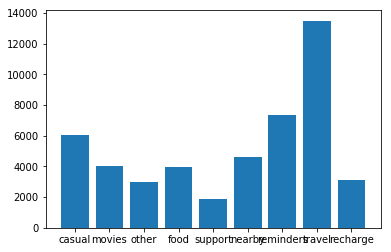

In [21]:
dic = {"food" : 3979 ,"recharge": 3087, "support": 1847, "reminders": 7331, "travel": 13504,
       "nearby": 4591,"movies": 4004, "casual": 6055, "other": 2989}

plt.bar(range(len(dic)), dic.values(), align='center', width=0.8)
plt.xticks(range(len(dic)), dic.keys())

plt.show()

Classification Function

In [22]:
def classification2(x_train, x_test, Y_train, Y_test, clf, 
                   tokenizer = TreebankWordTokenizer(),
                   stop_words=stops, ngram_range=[1, 3], 
                   max_df=0.5, min_df=2):
    
    vect = CountVectorizer()
    tokenizer = tokenizer
    vect.set_params(tokenizer=tokenizer.tokenize)
    vect.set_params(stop_words=stops)

    vect.set_params(max_df=max_df)
    vect.set_params(min_df=min_df)

    x_train = pd.Series([' '.join(x) for x in x_train])
    x_test = pd.Series([' '.join(x) for x in x_test])

    train_dtm = vect.fit_transform(x_train)

    test_dtm = vect.transform(x_test)

    clf.fit(train_dtm, Y_train)
    Y_pred_class = clf.predict(test_dtm)

    return  accuracy_score(Y_test, Y_pred_class), classification_report(Y_test, Y_pred_class)

## OneVsRest Classifier


In [23]:
acc, cm = classification2(x_train, x_test, Y_train, Y_test, clf = OneVsRestClassifier(MultinomialNB()))

In [24]:
print ("OneVsRestClassifier Accuracy:", acc*100)

OneVsRestClassifier Accuracy: 62.93


In [25]:
print ("Classification report for OneVsRestClassifier:", cm)

Classification report for OneVsRestClassifier:              precision    recall  f1-score   support

          0       0.80      0.63      0.70       810
          1       0.66      0.73      0.69       450
          2       0.63      0.42      0.51       371
          3       0.89      0.79      0.84       893
          4       0.77      0.87      0.82      2138
          5       0.55      0.64      0.59       807
          6       0.76      0.53      0.62       637
          7       0.89      0.57      0.70      3282
          8       0.89      0.64      0.75      1668

avg / total       0.81      0.67      0.72     11056



## Random forest Classifier

In [26]:
rf_acc, rf_cm = classification2(x_train, x_test, Y_train, Y_test, clf = RandomForestClassifier())

In [27]:
print ("Random forest Classifier Accuracy:", rf_acc*100)

print ("Classification report for Random forest Classifier:", rf_cm)

Random forest Classifier Accuracy: 66.95
Classification report for Random forest Classifier:              precision    recall  f1-score   support

          0       0.76      0.60      0.67       810
          1       0.72      0.65      0.68       450
          2       0.56      0.29      0.38       371
          3       0.85      0.84      0.85       893
          4       0.79      0.84      0.81      2138
          5       0.67      0.58      0.62       807
          6       0.67      0.63      0.65       637
          7       0.86      0.68      0.76      3282
          8       0.90      0.49      0.63      1668

avg / total       0.80      0.67      0.72     11056



# OneVsRestClassifier Accuracy: 63.09

# Randomforest Accuracy: 66.32
